In [1]:
import tensorflow as tf### models
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

## **Data Preparation**

In [32]:
data = pd.read_csv("train.csv")
data.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [33]:
data.shape

(1000, 12)

In [34]:
# data = pd.read_csv("train_semi.csv", ",")
# data.head()
# data.shape

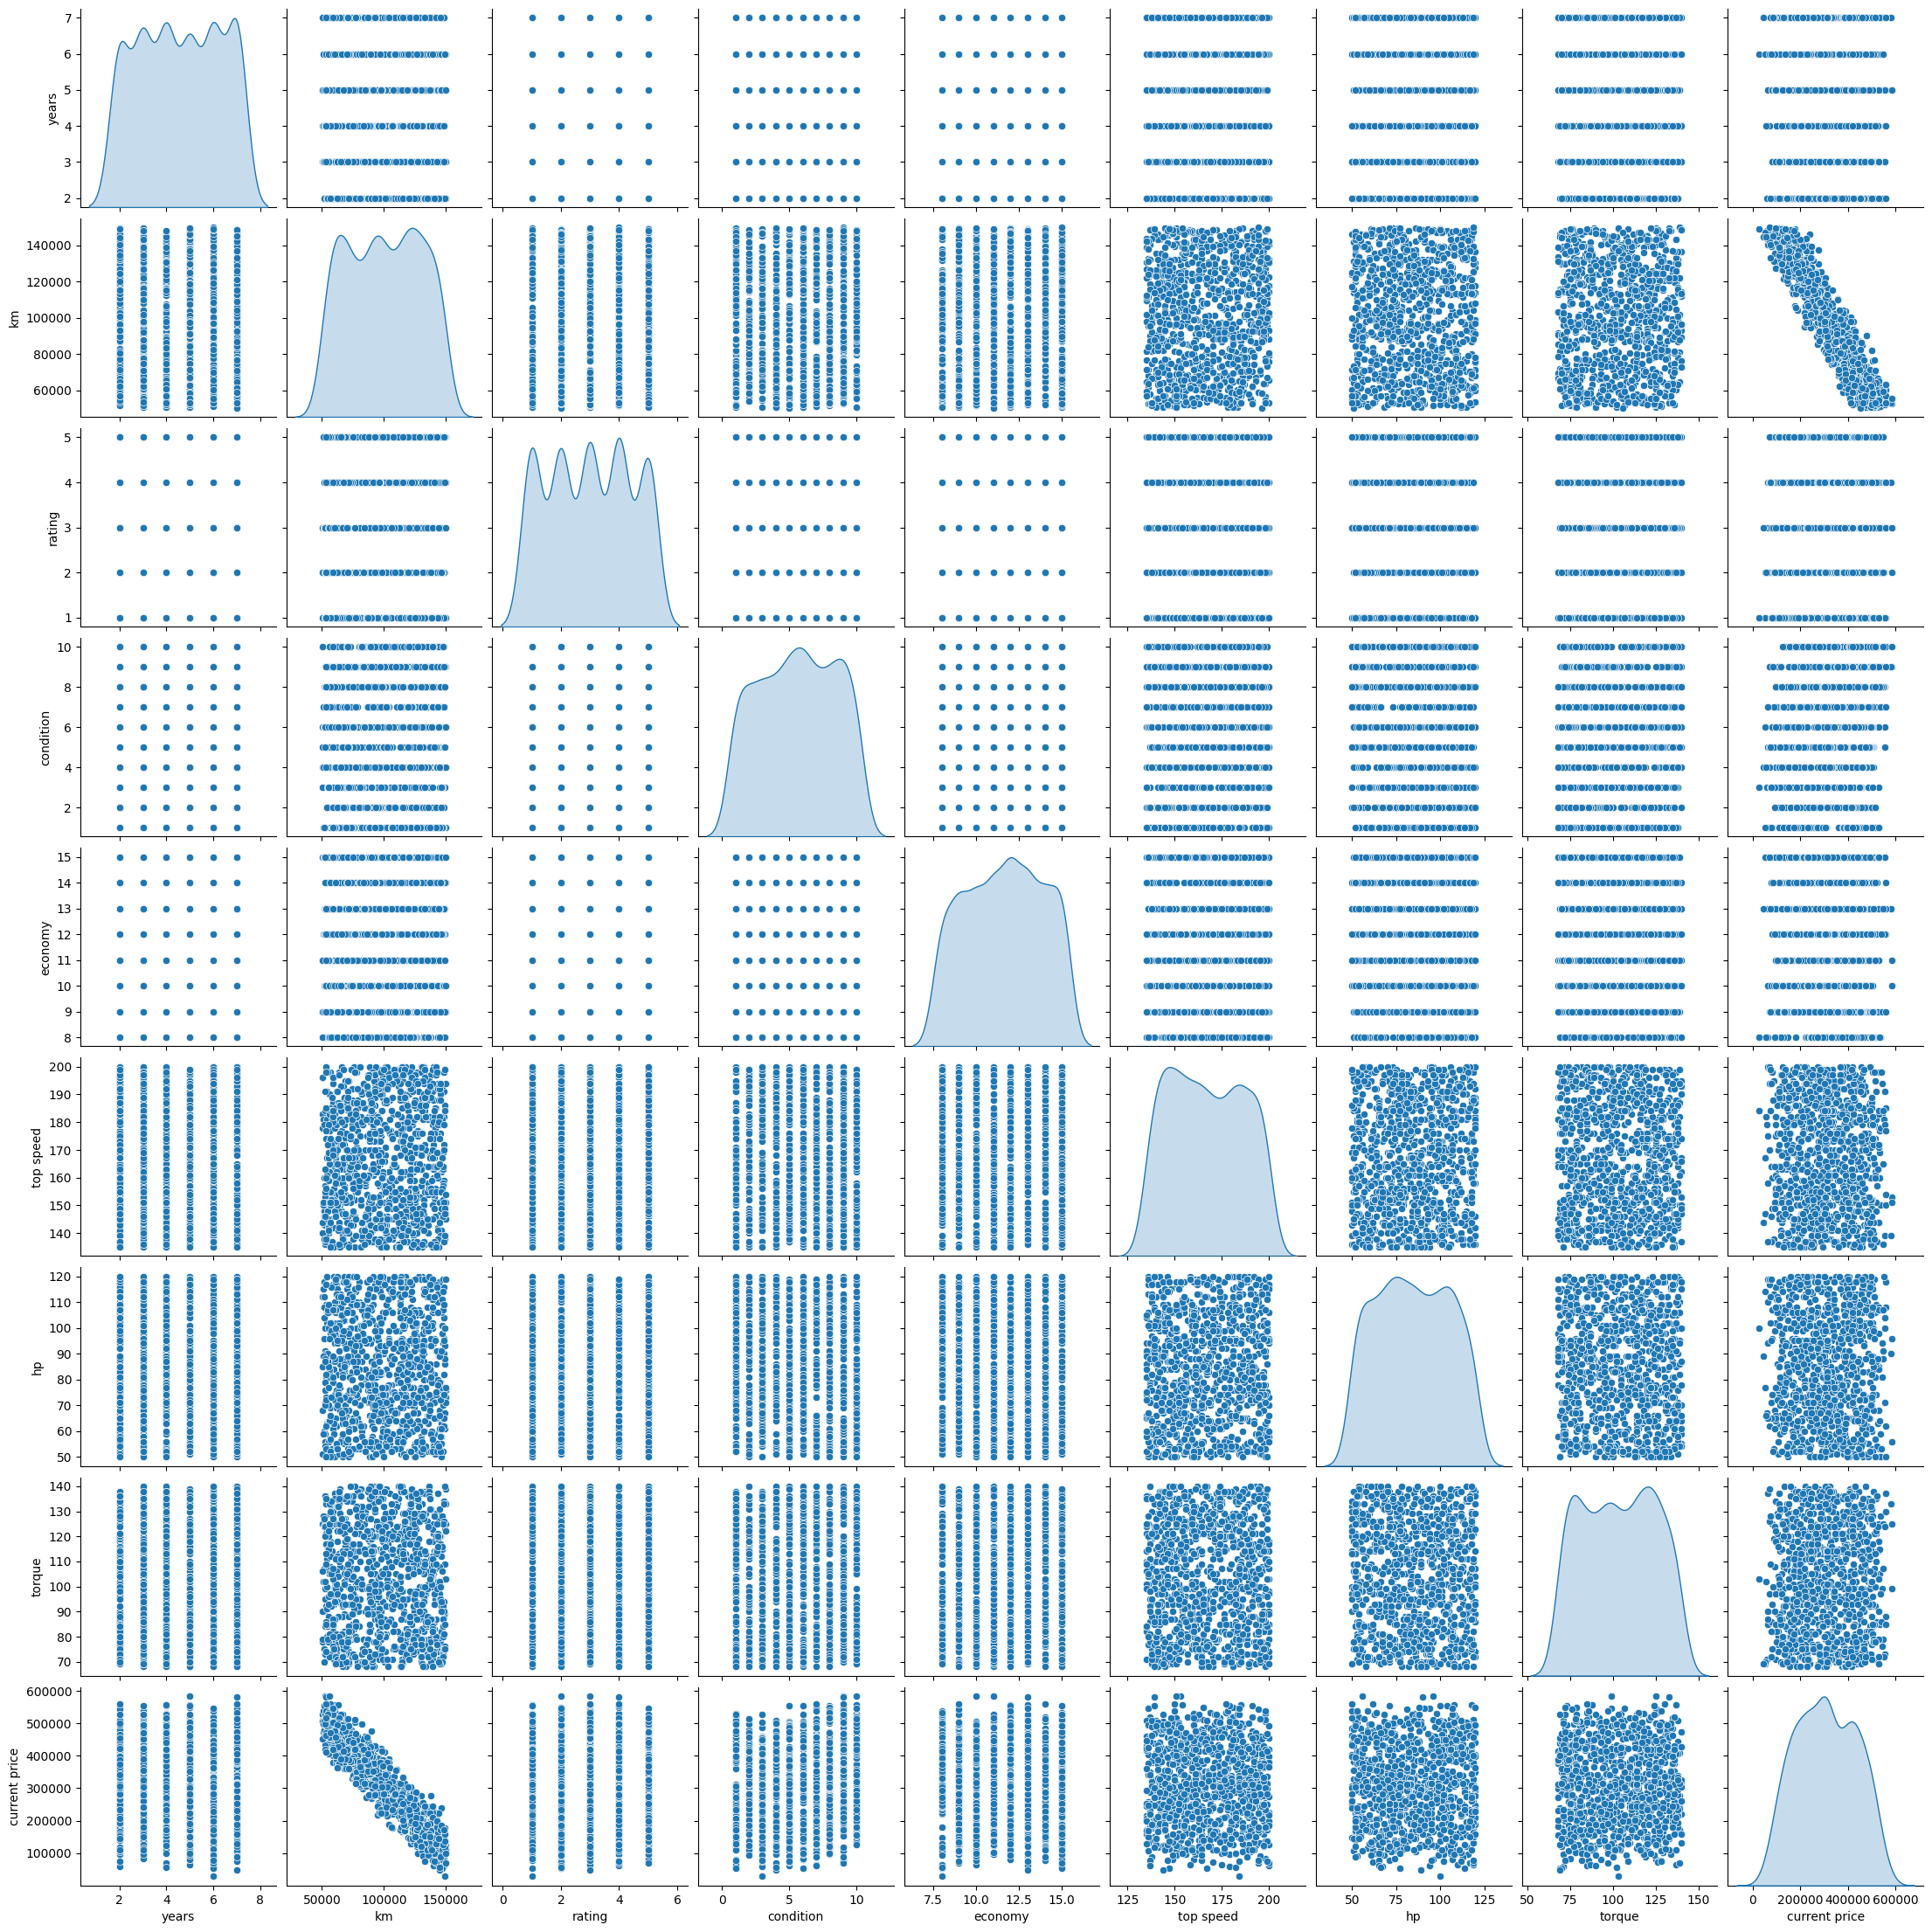

In [35]:
sns.pairplot(data[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind='kde')

In [36]:
tensor_data = tf.constant(data) #convert data to tensor
tensor_data = tf.cast(tensor_data, tf.float32) # if float16 inf appear as it not enough
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [37]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[8.840000e+02 6.828080e+05 7.275190e+05 3.000000e+00 1.163490e+05
  2.000000e+00 1.000000e+00 1.100000e+01 1.700000e+02 1.010000e+02
  1.290000e+02 2.399230e+05]
 [9.330000e+02 5.284090e+05 7.960460e+05 3.000000e+00 1.081260e+05
  2.000000e+00 1.000000e+01 1.000000e+01 1.670000e+02 8.800000e+01
  7.600000e+01 2.798335e+05]
 [1.620000e+02 6.096220e+05 7.535660e+05 7.000000e+00 6.187200e+04
  2.000000e+00 5.000000e+00 8.000000e+00 1.910000e+02 7.600000e+01
  1.000000e+02 4.274965e+05]
 [6.690000e+02 5.969070e+05 8.950800e+05 2.000000e+00 8.842000e+04
  2.000000e+00 7.000000e+00 1.500000e+01 1.730000e+02 1.190000e+02
  7.200000e+01 4.010115e+05]
 [6.240000e+02 6.731220e+05 8.972380e+05 3.000000e+00 8.827800e+04
  1.000000e+00 2.000000e+00 1.000000e+01 1.480000e+02 5.000000e+01
  9.500000e+01 4.321595e+05]], shape=(5, 12), dtype=float32)


In [38]:
X = tensor_data[:,3:-1]
print(X[:5])

tf.Tensor(
[[3.00000e+00 1.16349e+05 2.00000e+00 1.00000e+00 1.10000e+01 1.70000e+02
  1.01000e+02 1.29000e+02]
 [3.00000e+00 1.08126e+05 2.00000e+00 1.00000e+01 1.00000e+01 1.67000e+02
  8.80000e+01 7.60000e+01]
 [7.00000e+00 6.18720e+04 2.00000e+00 5.00000e+00 8.00000e+00 1.91000e+02
  7.60000e+01 1.00000e+02]
 [2.00000e+00 8.84200e+04 2.00000e+00 7.00000e+00 1.50000e+01 1.73000e+02
  1.19000e+02 7.20000e+01]
 [3.00000e+00 8.82780e+04 1.00000e+00 2.00000e+00 1.00000e+01 1.48000e+02
  5.00000e+01 9.50000e+01]], shape=(5, 8), dtype=float32)


In [39]:
y = tensor_data[:,-1]
print(y[:5].shape)
y = tf.expand_dims(y, axis = -1)  # to match ip
print(y[:5])

(5,)
tf.Tensor(
[[239923. ]
 [279833.5]
 [427496.5]
 [401011.5]
 [432159.5]], shape=(5, 1), dtype=float32)


In [40]:
normalizer = Normalization(axis = -1, mean = 5, variance = 4)
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,5,6,7,8]])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

In [41]:
normalizer = Normalization()
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,10,6,7,8],
                            [32,1,56,3,5]])
normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.7439795 , -0.26726124, -0.72800297,  0.3922322 ,  0.2672614 ],
       [-0.6695816 ,  1.3363062 , -0.6860028 ,  0.9805806 ,  1.0690452 ],
       [ 1.4135611 , -1.069045  ,  1.4140056 , -1.3728131 , -1.3363061 ]],
      dtype=float32)>

In [42]:
print(X.shape)

(1000, 8)


In [43]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [44]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [45]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [46]:
for x,y in train_dataset:
  print(x,y)
  break

tf.Tensor(
[[3.00000e+00 1.08126e+05 2.00000e+00 1.00000e+01 1.00000e+01 1.67000e+02
  8.80000e+01 7.60000e+01]
 [2.00000e+00 1.09453e+05 5.00000e+00 4.00000e+00 1.30000e+01 1.59000e+02
  9.90000e+01 1.05000e+02]
 [7.00000e+00 1.05481e+05 3.00000e+00 9.00000e+00 8.00000e+00 1.39000e+02
  5.30000e+01 1.02000e+02]
 [2.00000e+00 1.45030e+05 2.00000e+00 3.00000e+00 1.50000e+01 1.79000e+02
  6.70000e+01 7.10000e+01]
 [3.00000e+00 8.82780e+04 1.00000e+00 2.00000e+00 1.00000e+01 1.48000e+02
  5.00000e+01 9.50000e+01]
 [5.00000e+00 1.34781e+05 4.00000e+00 8.00000e+00 1.50000e+01 1.55000e+02
  1.08000e+02 9.90000e+01]
 [6.00000e+00 9.35720e+04 5.00000e+00 1.00000e+01 1.50000e+01 1.42000e+02
  5.60000e+01 1.15000e+02]
 [7.00000e+00 6.18720e+04 2.00000e+00 5.00000e+00 8.00000e+00 1.91000e+02
  7.60000e+01 1.00000e+02]
 [5.00000e+00 7.94580e+04 5.00000e+00 1.00000e+00 1.40000e+01 1.56000e+02
  8.40000e+01 1.32000e+02]
 [4.00000e+00 1.45992e+05 2.00000e+00 7.00000e+00 1.20000e+01 1.82000e+02
  1.06

In [47]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(0, 1)


In [48]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

ValueError: Dimensions 100 and 0 are not compatible

In [31]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(0, 1)


In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.31518766,  1.0132637 , -0.71715826, -0.91459674,  0.6136699 ,
        -1.301998  , -0.35419205,  0.3123971 ],
       [ 0.8309489 ,  0.15622592, -0.71715826,  1.1808989 ,  1.058761  ,
         0.5187977 ,  0.5274618 , -0.30444944],
       [ 0.8309489 , -0.09717798, -0.0044545 , -1.6130953 , -0.27651256,
        -1.0939071 ,  1.751981  ,  0.02769868],
       [-0.31518766, -1.6258478 , -0.71715826,  0.13315108,  1.5038522 ,
        -0.2095206 ,  0.18459642,  0.97669333],
       [-0.88825595,  1.0575535 , -1.429862  , -1.6130953 ,  0.16857865,
        -0.41761154,  0.42950028, -1.3483436 ]], dtype=float32)>

In [ ]:
print(X[:5])

tf.Tensor(
[[4.00000e+00 1.29251e+05 2.00000e+00 3.00000e+00 1.30000e+01 1.42000e+02
  7.70000e+01 1.10000e+02]
 [6.00000e+00 1.04308e+05 2.00000e+00 9.00000e+00 1.40000e+01 1.77000e+02
  9.50000e+01 9.70000e+01]
 [6.00000e+00 9.69330e+04 3.00000e+00 1.00000e+00 1.10000e+01 1.46000e+02
  1.20000e+02 1.04000e+02]
 [4.00000e+00 5.24430e+04 2.00000e+00 6.00000e+00 1.50000e+01 1.63000e+02
  8.80000e+01 1.24000e+02]
 [3.00000e+00 1.30540e+05 1.00000e+00 1.00000e+00 1.20000e+01 1.59000e+02
  9.30000e+01 7.50000e+01]], shape=(5, 8), dtype=float32)


## **Model Creation and Training**

In [18]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)), ###???
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1), # price
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (None, 8)                   │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,316 (134.05 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 11 (48.00 B)

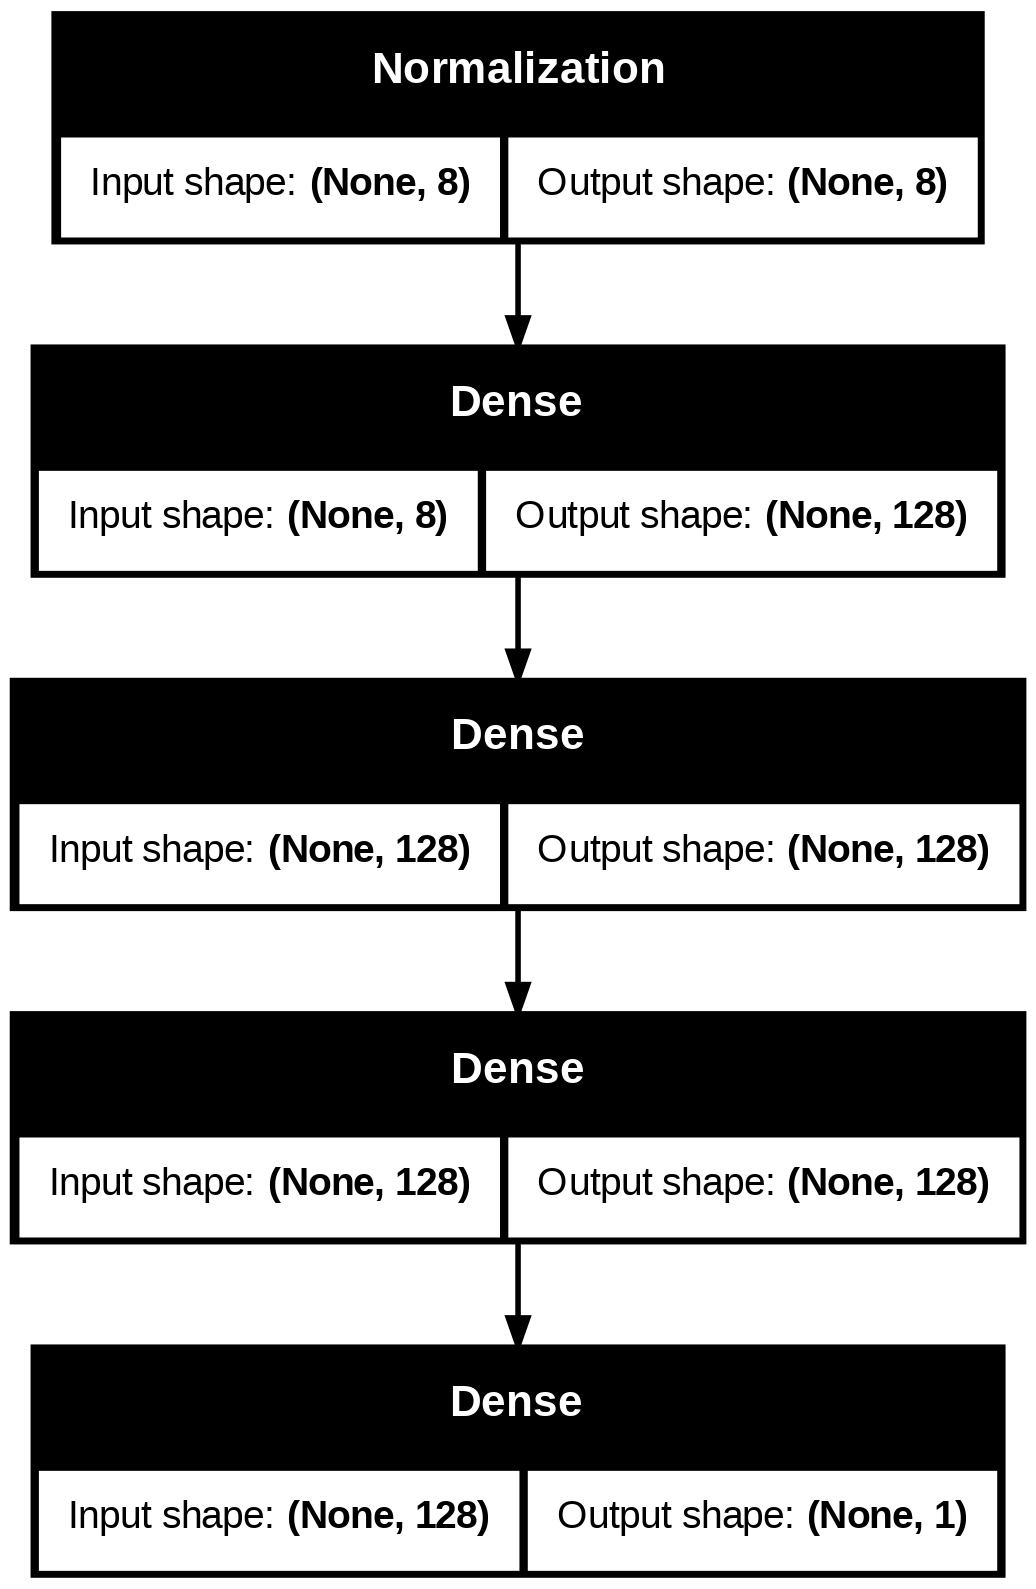

In [20]:
# plot model
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

In [23]:
model.compile(
    optimizer=Adam(learning_rate=0.1),
    loss=MeanAbsoluteError(),
    metrics=[RootMeanSquaredError()]  # Wrap in a list
)

In [24]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose = 1)

NameError: name 'train_dataset' is not defined

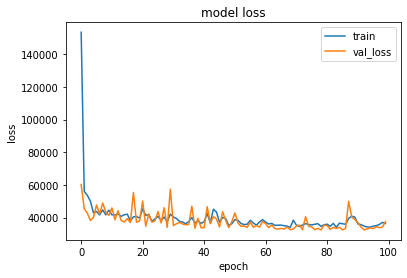

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

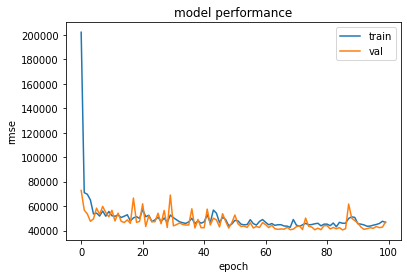

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

## **Model Evaluation and Testing**

In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 35082.9219 - root_mean_squared_error: 45458.8477


[35082.921875, 45458.84765625]

In [ ]:
X_test.shape

TensorShape([100, 8])

In [ ]:
model.predict(tf.expand_dims(X_test[0], axis = 0 ))

array([[465634.7]], dtype=float32)

In [ ]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([465338.5], dtype=float32)>

In [ ]:
y_true = list(y_test[:,0].numpy())

In [ ]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

[465634.7, 346877.6, 316944.53, 541506.4, 177605.89, 389100.53, 407023.3, 215957.14, 242833.12, 316479.53, 283034.28, 523835.53, 235925.12, 169588.38, 246495.66, 424280.38, 444110.28, 253352.94, 513701.28, 460727.66, 276458.38, 214403.03, 220393.1, 129725.375, 274199.8, 336481.06, 316167.84, 176357.14, 176709.47, 405825.3, 221231.02, 321881.72, 127336.555, 208712.95, 467812.22, 380431.0, 361381.9, 239841.12, 464587.47, 369859.16, 224781.88, 238386.03, 266883.12, 335518.03, 312324.72, 240562.16, 132587.97, 422667.72, 228218.1, 156495.84, 365251.53, 194797.8, 401961.06, 387540.25, 478644.16, 227816.22, 383970.72, 210779.62, 291278.78, 175252.11, 266432.1, 148648.31, 415452.88, 305756.9, 166695.77, 475147.22, 512314.84, 143468.97, 374273.22, 158544.81, 360469.16, 567642.06, 540250.2, 481704.6, 80303.1, 459162.03, 461067.16, 429522.4, 455283.94, 331594.3, 284699.8, 276452.72, 209741.05, 270829.62, 190786.22, 299014.84, 246887.86, 353629.97, 380103.03, 175247.42, 199458.3, 491509.22, 252743

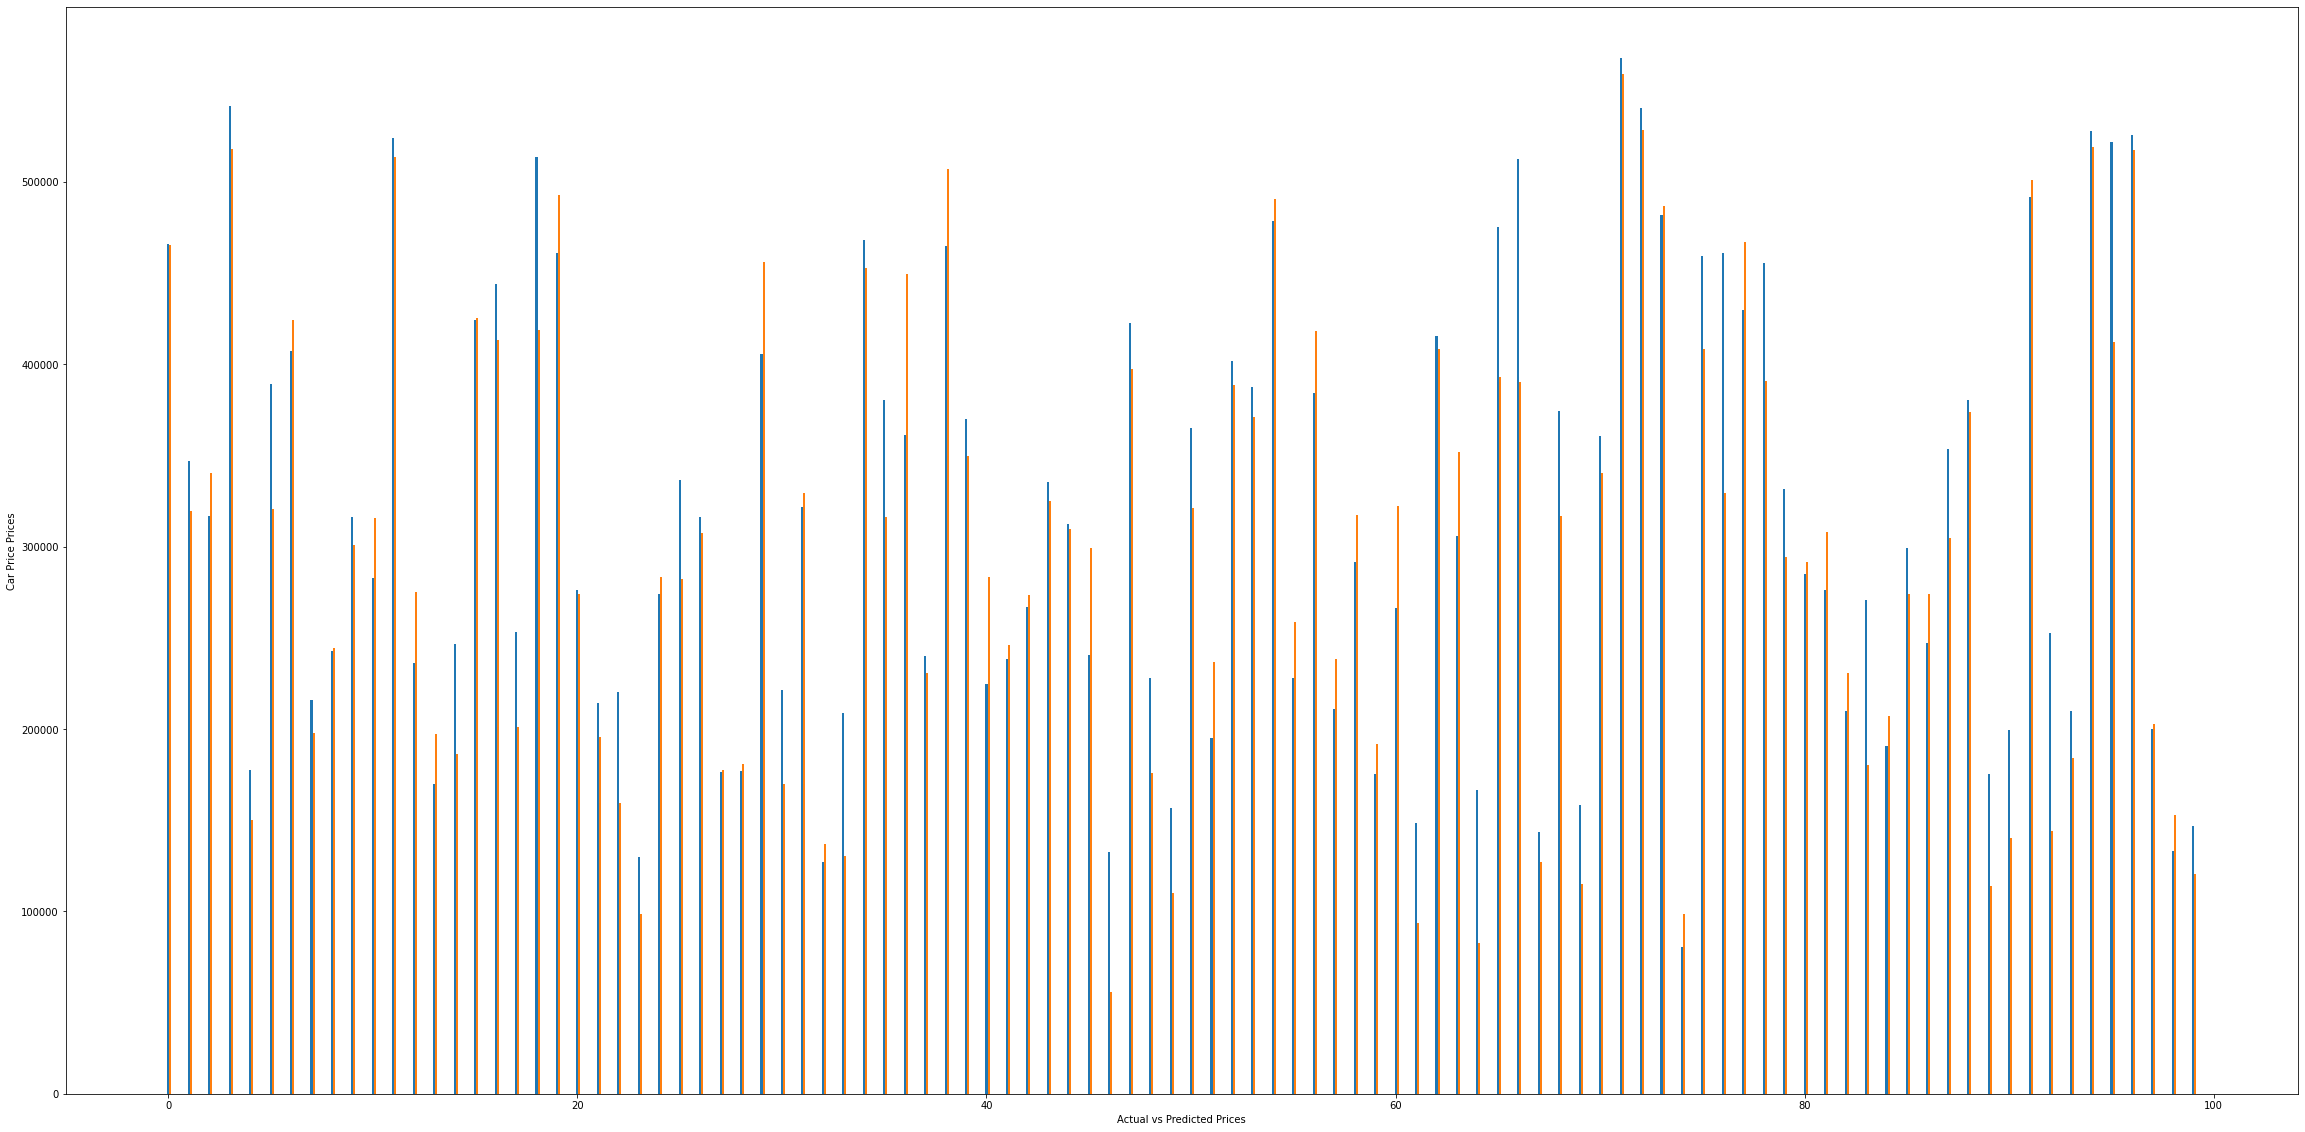

In [ ]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()